In [1]:
from IMPORTS import *

seed_value = 18
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

c:\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Python311\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and 

# ATE

Reading ATE json files

In [2]:
ATE_train = None
ATE_test = None
ATE_val = None
with open("Task1\processed\ATE_train.json") as f1:
    ATE_train  = json.load(f1)

with open("Task1\processed\ATE_test.json") as f2:
    ATE_test = json.load(f2)

with open("Task1\processed\ATE_val.json") as f3:
    ATE_val = json.load(f3)

Reading NER json files

In [3]:
NER_train = None
NER_test = None
NER_val = None
with open("Task1\processed\\NER_train.json") as f1:
    NER_train  = json.load(f1)

with open("Task1\processed\\NER_test.json") as f2:
    NER_test = json.load(f2)

with open("Task1\processed\\NER_val.json") as f3:
    NER_val = json.load(f3)

Loading the pre-trained models (Word2Vec, GloVE and fasttext)

In [4]:
word2vec = KeyedVectors.load_word2vec_format('WordEmbeddings/Word2Vec.bin',binary=True)

ATE Dataset

In [5]:
X_train_ate,Y_train_ate= create_train_test_val(ATE_train)
X_test_ate,Y_test_ate = create_train_test_val(ATE_test)
X_val_ate,Y_val_ate = create_train_test_val(ATE_val)

Tokenizing the ATE Dataset

In [6]:
X_train_ate_tokenized, toke = TokenCreator(X_train_ate,1)
X_test_ate_tokenized = TokenCreator(X_test_ate,0,tokenizer = toke)
X_val_ate_tokenized = TokenCreator(X_val_ate,0,tokenizer = toke)

Y_train_ate_tokenized,toke2 = TokenCreator(Y_train_ate,0)
Y_test_ate_tokenized = TokenCreator(Y_test_ate,0,tokenizer = toke2)
Y_val_ate_tokenized = TokenCreator(Y_val_ate,0,tokenizer = toke2)

Vocabulary of ATE

In [7]:
st1 = find_vocab(X_train_ate_tokenized)
vocab_size_ate  = len(st1) + 1 
vocab_size_ate

2406

Padding ATE

In [8]:
X_padded_train = pad_sequences(X_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train = pad_sequences(Y_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test = pad_sequences(X_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test = pad_sequences(Y_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val = pad_sequences(X_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val = pad_sequences(Y_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")

One hot encoding the ATE labels

In [9]:
Y_padded_train = to_categorical(Y_padded_train)
Y_padded_test = to_categorical(Y_padded_test)
Y_padded_val = to_categorical(Y_padded_val)

Assigning ATE Word2Vec mapping

In [10]:
weights_ate_word2vec = np.zeros((vocab_size_ate, 300))

mapping_ate_word2vec = toke.word_index 
mapping_ate_word2vec

{'#UK': 1,
 'the': 2,
 '.': 3,
 ',': 4,
 'and': 5,
 'it': 6,
 'to': 7,
 'i': 8,
 'is': 9,
 'a': 10,
 'of': 11,
 'for': 12,
 'with': 13,
 'that': 14,
 'my': 15,
 'you': 16,
 'this': 17,
 'was': 18,
 'in': 19,
 'not': 20,
 'on': 21,
 'very': 22,
 'but': 23,
 'computer': 24,
 'use': 25,
 'have': 26,
 'great': 27,
 'they': 28,
 'laptop': 29,
 "n't": 30,
 'so': 31,
 'has': 32,
 'are': 33,
 'battery': 34,
 'had': 35,
 'screen': 36,
 ')': 37,
 'be': 38,
 'as': 39,
 'all': 40,
 '!': 41,
 '(': 42,
 "'s": 43,
 'also': 44,
 'me': 45,
 'just': 46,
 'easy': 47,
 'when': 48,
 'at': 49,
 'or': 50,
 'only': 51,
 'which': 52,
 'up': 53,
 'life': 54,
 'can': 55,
 'windows': 56,
 'than': 57,
 'out': 58,
 'if': 59,
 'do': 60,
 'after': 61,
 'more': 62,
 'keyboard': 63,
 'would': 64,
 'drive': 65,
 'hard': 66,
 'price': 67,
 'from': 68,
 'well': 69,
 'because': 70,
 'good': 71,
 'one': 72,
 'an': 73,
 'like': 74,
 'mac': 75,
 'about': 76,
 'quality': 77,
 'its': 78,
 'love': 79,
 'get': 80,
 'no': 81,
 'so

Fetching weights from pre trained Word2Vec model (ATE)

In [11]:
for word, index in mapping_ate_word2vec.items():
    if word in word2vec:
        weights_ate_word2vec[index:] = word2vec[word]

Initializing the rnn Model

In [12]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim = vocab_size_ate,output_dim = 300,input_length  = 100,weights = [weights_ate_word2vec],trainable = False))
rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(TimeDistributed(Dense(Y_padded_train.shape[2], activation='softmax')))

Compiling the rnn Model

In [13]:
rnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',Precision(),Recall()])

In [14]:
rnn_f1_callback_val = F1ScoreCallback(data=(X_padded_val, Y_padded_val),name='validation')
rnn_f1_callback_train=F1ScoreCallback(data=(X_padded_train, Y_padded_train),name='training')

In [15]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          721800    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 64)           23360     
                                                                 
 time_distributed (TimeDist  (None, 100, 4)            260       
 ributed)                                                        
                                                                 
Total params: 745420 (2.84 MB)
Trainable params: 23620 (92.27 KB)
Non-trainable params: 721800 (2.75 MB)
_________________________________________________________________


Fitting the rnn model

In [16]:
rnn_training = rnn_model.fit(X_padded_train, Y_padded_train, batch_size=128, epochs=15, validation_data=(X_padded_val, Y_padded_val), callbacks=[rnn_f1_callback_train,rnn_f1_callback_val])

Epoch 1/15


29/29 [==============================] - 0s 10ms/step: 1.0337 - acc: 0.8839 - precision: 0.9305 - re
training F1 Score: 0.25300177931785583
7/7 [==============================] - 0s 8ms/step
validation F1 Score: 0.1680271476507187
8/8 [==============================] - 5s 423ms/step - loss: 1.0337 - acc: 0.8839 - precision: 0.9305 - recall: 0.2792 - val_loss: 0.5351 - val_acc: 0.8837 - val_precision: 0.8953 - val_recall: 0.7495
Epoch 2/15
29/29 [==============================] - 0s 7ms/steps: 0.3985 - acc: 0.9193 - precision: 0.9260 - recall
training F1 Score: 0.16588053107261658
7/7 [==============================] - 0s 10ms/step
validation F1 Score: 0.1836213618516922
8/8 [==============================] - 3s 386ms/step - loss: 0.3975 - acc: 0.9196 - precision: 0.9262 - recall: 0.8196 - val_loss: 0.2831 - val_acc: 0.9484 - val_precision: 0.9542 - val_recall: 0.8786
Epoch 3/15
29/29 [==============================] - 0s 11ms/step: 0.2489 - acc: 0.9585 - precision: 0.9608 

Testing accuracy

In [17]:
accuracy = rnn_model.evaluate(X_padded_test, Y_padded_test, verbose = 1)
print(accuracy[1])

 1/11 [=>............................] - ETA: 0s - loss: 0.1005 - acc: 0.9781 - precision: 0.9789 - recall: 0.9559

11/11 [==============================] - 0s 9ms/step - loss: 0.1075 - acc: 0.9752 - precision: 0.9771 - recall: 0.9533
0.9751524329185486


Testing F1 Score

In [18]:
Y_pred_ate = rnn_model.predict(X_padded_test)
real = get_real(Y_padded_test)
pred = get_pred(Y_pred_ate)
f1 = F1Score(average='macro')
f1.update_state(real,pred)
f1_score = f1.result().numpy()
print(f"F1 Score ATE : {f1_score}")

11/11 [==============================] - 0s 8ms/step
F1 Score ATE : 0.4598912000656128


Plotting the graph

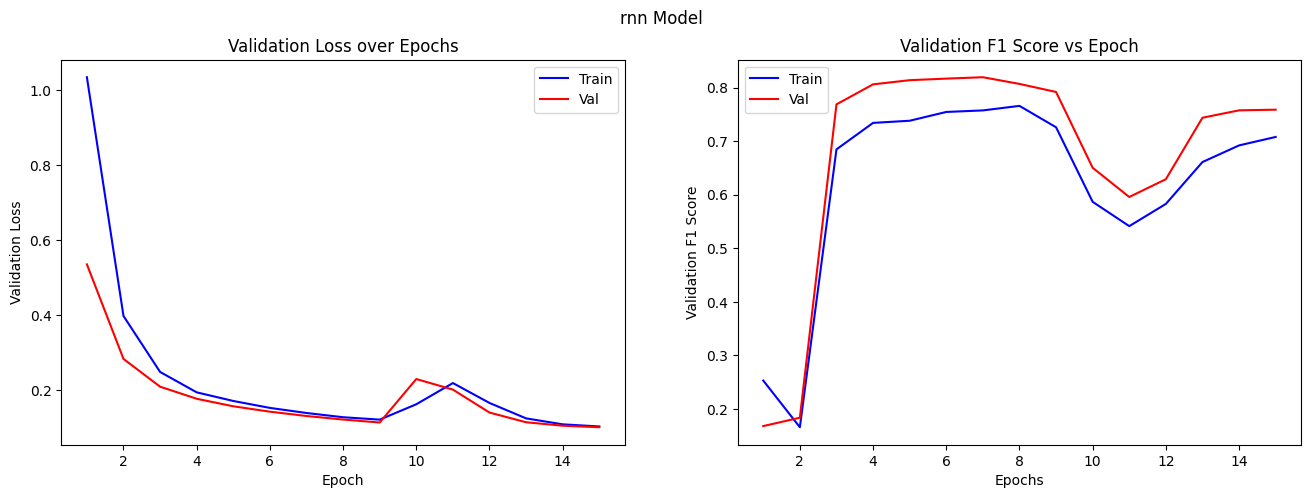

In [19]:
draw_loss_graph(rnn_training, "rnn Model", rnn_f1_callback_train.f1_scores, rnn_f1_callback_val.f1_scores)
save_model(rnn_model, "rnn","Word2Vec","t2")
loaded_model = load_model("Saved_Models/t2_rnn_Word2Vec.pkl")

# NER

Reading NER json files

In [20]:
NER_train = None
NER_test = None
NER_val = None
with open("Task1\processed\\NER_train.json") as f1:
    NER_train  = json.load(f1)

with open("Task1\processed\\NER_test.json") as f2:
    NER_test = json.load(f2)

with open("Task1\processed\\NER_val.json") as f3:
    NER_val = json.load(f3)

NER Dataset

In [21]:
X_train_ner,Y_train_ner = create_train_test_val(NER_train)
X_test_ner,Y_test_ner = create_train_test_val(NER_test)
X_val_ner,Y_val_ner = create_train_test_val(NER_val)

Tokenizing the NER Dataset

In [22]:
X_train_ner_tokenized, toke = TokenCreator(X_train_ner,1)
X_test_ner_tokenized = TokenCreator(X_test_ner,0,tokenizer = toke)
X_val_ner_tokenized = TokenCreator(X_val_ner,0,tokenizer = toke)

Y_train_ner_tokenized,toke2 = TokenCreator(Y_train_ner,0)
Y_test_ner_tokenized = TokenCreator(Y_test_ner,0,tokenizer = toke2)
Y_val_ner_tokenized = TokenCreator(Y_val_ner,0,tokenizer = toke2)

Vocabulary of NER

In [23]:
st2 = find_vocab(X_train_ner_tokenized)
vocab_size_ner = len(st2) + 1
vocab_size_ner

30220

Padding NER

In [24]:
X_padded_train_ner = pad_sequences(X_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train_ner = pad_sequences(Y_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test_ner = pad_sequences(X_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test_ner = pad_sequences(Y_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val_ner = pad_sequences(X_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val_ner = pad_sequences(Y_val_ner_tokenized, maxlen=100, padding="pre", truncating="post") 

One hot encoding the NER labels

In [25]:
Y_padded_train_ner = to_categorical(Y_padded_train_ner)
Y_padded_test_ner = to_categorical(Y_padded_test_ner)
Y_padded_val_ner = to_categorical(Y_padded_val_ner)

Assigning NER Word2Vec mapping

In [26]:
weights_ner_word2vec = np.zeros((vocab_size_ner, 300))

mapping_ner_word2vec = toke.word_index 
mapping_ner_word2vec

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

Fetching weights from pre trained Word2Vec model (NER)

In [27]:
for word, index in mapping_ner_word2vec.items():
    if word in word2vec:
        weights_ner_word2vec[index:] = word2vec[word]

Initializing the rnn Model for NER

In [28]:
rnn_model_ner = Sequential()
rnn_model_ner.add(Embedding(input_dim = vocab_size_ner,output_dim = 300,input_length  = 100,weights = [weights_ner_word2vec],trainable = False))
rnn_model_ner.add(SimpleRNN(64, return_sequences=True))
rnn_model_ner.add(TimeDistributed(Dense(Y_padded_train_ner.shape[2], activation='softmax')))

Compiling the RNN Model

In [29]:
rnn_model_ner.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',Precision(),Recall()])

In [30]:
rnn_f1_callback_val_ner = F1ScoreCallback(data=(X_padded_val_ner, Y_padded_val_ner),name='validation')
rnn_f1_callback_train_ner=F1ScoreCallback(data=(X_padded_train_ner, Y_padded_train_ner),name='training')

In [31]:
rnn_model_ner.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          9066000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 64)           23360     
                                                                 
 time_distributed_1 (TimeDi  (None, 100, 28)           1820      
 stributed)                                                      
                                                                 
Total params: 9091180 (34.68 MB)
Trainable params: 25180 (98.36 KB)
Non-trainable params: 9066000 (34.58 MB)
_________________________________________________________________


Fitting the rnn model

In [32]:
rnn_training_ner = rnn_model_ner.fit(X_padded_train_ner, Y_padded_train_ner, batch_size=128, epochs=15, validation_data=(X_padded_val_ner, Y_padded_val_ner), callbacks=[rnn_f1_callback_train_ner,rnn_f1_callback_val_ner])

Epoch 1/15


251/251 [==============================] - 2s 8ms/step
training F1 Score: 0.8437872529029846
45/45 [==============================] - 0s 8ms/step
validation F1 Score: 0.8056898713111877
63/63 [==============================] - 36s 546ms/step - loss: 1.1794 - acc: 0.8683 - precision_1: 0.9314 - recall_1: 0.5737 - val_loss: 0.4411 - val_acc: 0.9301 - val_precision_1: 0.9340 - val_recall_1: 0.8855
Epoch 2/15
251/251 [==============================] - 2s 7ms/step
training F1 Score: 0.6345221400260925
45/45 [==============================] - 0s 6ms/step
validation F1 Score: 0.6025821566581726
63/63 [==============================] - 30s 475ms/step - loss: 0.4404 - acc: 0.9224 - precision_1: 0.9275 - recall_1: 0.8865 - val_loss: 0.3826 - val_acc: 0.9333 - val_precision_1: 0.9431 - val_recall_1: 0.8954
Epoch 3/15
251/251 [==============================] - 2s 6ms/steps: 0
training F1 Score: 0.5818464756011963
45/45 [==============================] - 1s 12ms/step
validation F1 Score: 0.56114411

Testing the accuracy

In [33]:
accuracy = rnn_model_ner.evaluate(X_padded_test_ner, Y_padded_test_ner, verbose = 1)
print(accuracy[1])

 1/30 [>.............................] - ETA: 1s - loss: 0.3470 - acc: 0.9344 - precision_1: 0.9433 - recall_1: 0.9106

30/30 [==============================] - 0s 15ms/step - loss: 0.2315 - acc: 0.9509 - precision_1: 0.9625 - recall_1: 0.9328
0.9509483575820923


Testing F1 Score

In [36]:
Y_pred_ner = rnn_model_ner.predict(X_padded_test_ner)
real_ner = get_real(Y_padded_test_ner)
pred_ner = get_pred(Y_pred_ner)
f1 = F1Score(average='macro')
f1.update_state(real_ner,pred_ner)
f1_score = f1.result().numpy()
print(f"F1 Score NER : {f1_score}")

30/30 [==============================] - 0s 9ms/step
F1 Score NER : 0.4520886242389679
